In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

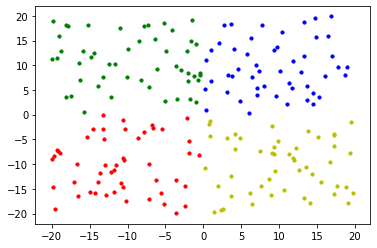

In [3]:
# Prevent divide by 0 errors
np.seterr(divide='ignore', invalid='ignore')
# Generate 4 groups of random 2d data
bgroup = 20 * np.random.rand(200, 2)
rgroup = -20 * np.random.rand(50, 2)
ggroup = 20 * np.random.rand(50, 2) - 50 * [[20, 0]]
ygroup = 20 * np.random.rand(50, 2) - 50 * [[0, 20]]
# Replace the quadrants of bgroup with the other groups
bgroup[50:100, :] = rgroup
bgroup[100:150, :] = ggroup
bgroup[150:200, :] = ygroup
plt.scatter(bgroup[0:50, 0], bgroup[0:50, 1], s = 10, c = 'b')
plt.scatter(bgroup[50:100, 0], bgroup[50:100, 1], s = 10, c = 'r')
plt.scatter(bgroup[100:150, 0], bgroup[100:150, 1], s = 10, c = 'g')
plt.scatter(bgroup[150:200, 0], bgroup[150:200, 1], s = 10, c = 'y')
plt.show()

In [4]:
Kmean = KMeans(n_clusters = 4)
Kmean.fit(bgroup)
Kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1
 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


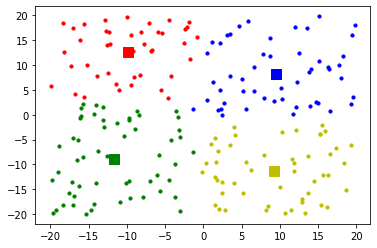

In [6]:
print(Kmean.labels_)
labels = Kmean.labels_
centroids = Kmean.cluster_centers_

for i in range(200):
    if labels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if labels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if labels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if labels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(centroids[2][0], centroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(centroids[3][0], centroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [35]:
# Our KMeans class
class KMemes:
    # Constructor
    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.labels_ = []
        self.centroids = []
        self.fitted = False

    # array has 2 axes- (number of points, dimensions per point)
    def fit(self, array):

        if len(np.shape(array)) != 2:
            print("Error: bad array shape")
            return
        
        # Get number of dimensions for each point
        self.point_dimensions = np.shape(array)[1]
        # labels has an int representing a centroids index for each point
        self.labels_ = np.zeros(shape=(np.shape(array)[0]), dtype = int)
        # resize centroids
        self.centroids = np.zeros(shape=(self.n_clusters, self.point_dimensions))
        # Used to compare different runs against each other
        self.best_distance = sys.maxsize # infinity
        # Number of iterations on best run
        self.best_iterations = 0

        # This loop tries out n_init different fits
        for i in range(self.n_init):
            # Used to measure how many iterations were run
            iterations = 0
            # Randomly select centroids (don't directly change self.centroids yet)
            new_centroids = np.random.rand(self.n_clusters, self.point_dimensions)
            new_labels = np.zeros(shape=(np.shape(array)[0]), dtype = int)
            prev_distance = sys.maxsize
            # This loop improves the fits
            while True:
                iterations += 1
                total_distance = 0
                
                # Get the closest centroid for each data point
                # vectorizalized dark magic- repeat (tile) copies of the arrays to get pair distances
                _new_centroids = new_centroids
                _array = array
                numcentroids = len(_new_centroids)
                numpoints = len(_array)
                _new_centroids = np.repeat([_new_centroids], numpoints, axis = 0)
                _new_centroids = _new_centroids.reshape(numcentroids)
                _new_centroids = _new_centroids.reshape((numpoints * numcentroids), int(len(_new_centroids)/(numpoints * numcentroids)))
                _array = np.repeat([_array], numcentroids, axis = 1)
                # finding dimension-wise distances in vectorizalied way
                square_distances = (_new_centroids - _array)**2
                square_distances = square_distances.sum(axis = 2).reshape(numpoints, numcentroids)
                # new_labels gets the indicies of the closest centroids for each point
                new_labels = argmin(square_distances, axis = 1)


                # Get the closest centroid for each data point
                for point in range(len(array)):
                    # Shortest distance from a centroid to the point
                    shortest_distance = sys.maxsize
                    for centroid in range(self.n_clusters):
                        current_distance = 0
                        # Calculate squared distance from centroid to point (computation efficiency) using dot product of vector and transpose vector
                        # Use different indexing syntax for numpy array vs pandas dataframe
                        if isinstance(array, np.ndarray): 
                            diff = new_centroids[centroid] - array[point]
                            current_distance = np.dot(diff, diff.T)
                            # for dimension in range(self.point_dimensions):
                            #     current_distance += (new_centroids[centroid][dimension] - array[point][dimension])**2
                        elif isinstance(array, pd.DataFrame):
                            # for dimension in range(self.point_dimensions):
                            #     current_distance += (new_centroids[centroid][dimension] - array.iloc[point, dimension])**2
                            diff = new_centroids[centroid] - array[point]
                            current_distance = np.dot(diff, diff.T)
                        if current_distance < shortest_distance:
                            shortest_distance = current_distance
                            # Label each point with its closest centroid
                            new_labels[point] = centroid
                    total_distance += shortest_distance


                # Update centroids with means of each cluster:
                # Sum of coordinates of all points in each cluster
                cluster_coordinate_sums = np.zeros((self.n_clusters, self.point_dimensions), dtype=float)
                # Number of points in each cluster
                cluster_numberof_points = np.zeros(self.n_clusters)
                # Check which centroid for every point TODO vectorialize this
                for point in range(len(array)):
                    # labels_[point] is the centroid index of the data point with index 'point'
                    if isinstance(array, np.ndarray):
                        cluster_coordinate_sums[new_labels[point]] += array[point]
                    elif isinstance(array, pd.DataFrame):
                        cluster_coordinate_sums[new_labels[point]] += array.iloc[point,:]
                    cluster_numberof_points[new_labels[point]] += 1
                cluster_numberof_points = cluster_numberof_points.reshape(np.shape(cluster_numberof_points)[0], 1)
                new_centroids = cluster_coordinate_sums / cluster_numberof_points
                # Stop iterating once the distance has stopped decreasing
                if np.abs(prev_distance - total_distance) < 10:
                    self.fitted = True
                    if total_distance < self.best_distance:
                        self.best_distance = total_distance
                        self.best_iterations = iterations
                        # Update the actual centroids and labels
                        self.centroids = new_centroids
                        self.labels_ = new_labels
                    break
                prev_distance = total_distance

    def debugprint(self):
        if self.fitted == False:
            print("Not fitted")
            return
        print("centroids: " + str(self.centroids))
        print("labels: " + str(self.labels_))   
        print("iterations: " + str(self.best_iterations))
        print("distance sum: " + str(self.best_distance))
    # input a point with dimension (point_dimensions), outputs the label
    # def predict(point):
        


In [29]:
# Useful for explaining the vectorialization part

centroids = [[1, 2], [2, 2]]
points = [[3, 4], [4, 5], [6, 7]]
numcentroids = len(centroids)
numpoints = len(points)
# gets the numbers into correct order
centroids = np.repeat([centroids], numpoints, axis = 0)
# print(centroids)
# reshapes the numbers into one array
centroids = centroids.reshape(centroids.size)
# print(centroids)
# reshapes the centroids so each points gets one set of centroids
centroids = centroids.reshape((numpoints * numcentroids), int(len(centroids)/(numpoints * numcentroids)))
# print(centroids)
# reshapes the points so each centroid in the reshaped list has a matching point
points = np.repeat([points], numcentroids, axis = 1)
# print(points)
square_distances = (centroids - points)**2
square_distances = square_distances.sum(axis = 2).reshape(numpoints, numcentroids)
print(square_distances)
labels = np.argmin(square_distances, axis = 1)
total_distances = square_distances[labels]
total_distances

[[ 8  5]
 [18 13]
 [50 41]]


TypeError: only integer scalar arrays can be converted to a scalar index

centroids: [[-10.14118965  11.25739043]
 [  9.27164344 -11.39350791]
 [  9.48817984   8.20681642]
 [-11.68876305 -10.044876  ]]
labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
iterations: 8
distance sum: 13732.993124101402


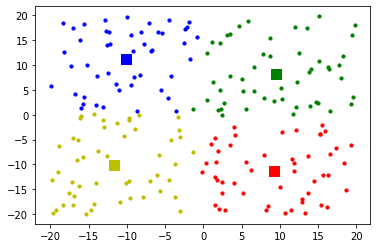

In [31]:
myKmeans = KMemes(n_clusters = 4, n_init = 50)
myKmeans.fit(bgroup)
myKmeans.debugprint()

myLabels = myKmeans.labels_
myCentroids = myKmeans.centroids

for i in range(200):
    if myLabels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if myLabels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if myLabels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if myLabels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(myCentroids[0][0], myCentroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(myCentroids[1][0], myCentroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(myCentroids[2][0], myCentroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(myCentroids[3][0], myCentroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [9]:
# Import the spotify data
data_raw = pd.read_csv('data_by_artist_o.csv')

In [16]:
# Drop useless columns
data = data_raw.drop(columns = ['genres', 'artists', 'duration_ms', 'count', 'key'])
data = data.dropna()

In [17]:
# Fit scikit model to data
scikitFit = KMeans()
scikitFit.fit(data)
scikitFit.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [36]:
# Fit our model to data
ourFit = KMemes(n_clusters = 8, n_init = 5)
ourFit.fit(data)

KeyError: 0

In [27]:
# create a new column giving the scikit label of each artist
data['scikitLabel'] = scikitFit.labels_
centroids = scikitFit.cluster_centers_
data
# for i in range(200):
#     if labels[i] == 0:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
#     if labels[i] == 1:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
#     if labels[i] == 2:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
#     if labels[i] == 3:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

# plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'b', marker='s')
# plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'r', marker='s')
# plt.scatter(centroids[2][0], centroids[2][1], s = 100, c = 'g', marker='s')
# plt.scatter(centroids[3][0], centroids[3][1], s = 100, c = 'y', marker='s')

# plt.show()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,mode,scikitLabel
0,0.590111,0.467222,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,1,5
1,0.862538,0.441731,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,1,5
2,0.856571,0.348286,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,1,2
3,0.884926,0.425074,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,1,2
4,0.510714,0.467143,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28675,0.512000,0.356000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,1,6
28676,0.541000,0.578000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,0,6
28677,0.785455,0.570818,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,1,5
28678,0.381000,0.353000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,1,3
